In [94]:
import pathlib
import imageio
import numpy as np
import pandas as pd
from scipy import ndimage
from skimage.color import rgb2gray

# for viewing images
from IPython.display import Image
from IPython.display import display

training_paths = pathlib.Path('data/stage1_train').glob('*/images/*.png')
training_sorted = sorted(x for x in training_paths)

In [75]:
im = imageio.imread(str(training_sorted[103]))

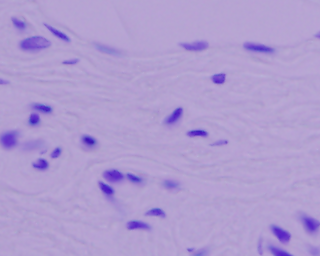

In [76]:
Image(str(training_sorted[103]))

In [77]:
im_gray = rgb2gray(im)

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


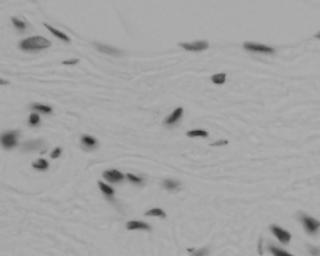

In [86]:
imageio.imwrite('./output.png', im_gray)
Image('./output.png')

In [87]:
from skimage.filters import threshold_otsu

# create mask
thresh_val = threshold_otsu(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)
# ensure larger part of mask is background
if np.sum(mask==0) < np.sum(mask==1):
    mask = np.where(mask, 0, 1)

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int64 to uint8, range [0, 1]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


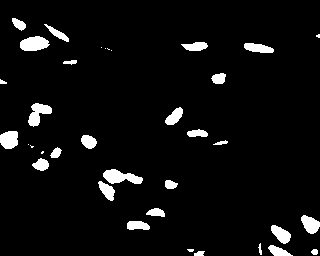

In [88]:
imageio.imwrite('/tmp/mask.png', mask)
Image('/tmp/mask.png')

In [89]:
for label_ind, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = im_gray[label_coords]
    if np.product(cell.shape) < 20:
        print(f'label {label_ind} too small')
        # update mask to eliminate noise
        mask = np.where(labels==label_ind+1, 0, mask)
labels, nlabels = ndimage.label(mask)

label 2 too small
label 6 too small
label 7 too small
label 8 too small
label 9 too small
label 10 too small
label 20 too small
label 21 too small
label 22 too small
label 24 too small


/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int64 to uint8, range [0, 1]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


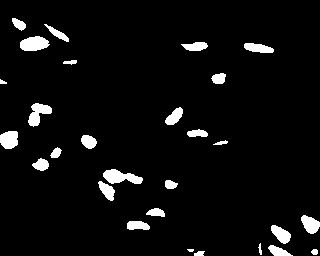

In [90]:
imageio.imwrite('/tmp/mask2.png', mask)
Image('/tmp/mask2.png')

In [91]:
two_cell_indices = ndimage.find_objects(labels)
cell_mask = mask[two_cell_indices[3]]
cell_mask_opened = ndimage.binary_opening(cell_mask, iterations=8)

In [93]:
object_indices = ndimage.find_objects(labels)

# write objects to their own files
for idx, oi in enumerate(object_indices):
    imageio.imwrite(f'/tmp/object_{idx}.png', mask[oi])
    display(Image(f'/tmp/object_{idx}.png', width=100))

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from int64 to uint8, range [0, 1]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [37]:
double_image = mask[object_indices[9]]

In [47]:
opened = ndimage.binary_opening(double_image, iterations=5)

In [48]:
imageio.imwrite('/tmp/opened.png', opened)
display(Image('/tmp/object_9.png', width=200))
display(Image('/tmp/opened.png', width=200))

/usr/local/lib/python3.6/site-packages/imageio/core/util.py:104: UserWarning: Conversion from bool to uint8, range [False, True]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [63]:
o5 = ndimage.binary_opening(double_image, iterations=5)
o6 = ndimage.binary_opening(double_image, iterations=6)

In [64]:
True in o5

True

In [65]:
True in o6

False

In [53]:
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

print('RLE Encoding for the current mask is: {}'.format(rle_encoding(label_mask)))

RLE Encoding for the current mask is: 49918 3 50174 3 50430 3 50685 4 50940 5 51196 5 51452 5 51708 5 51964 5 52220 3 52224 1 52476 1
